In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.models import Model
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform
from keras.engine.topology import Layer
from keras import backend as K
K.set_image_data_format('channels_first')
import cv2
import dlib
import os
import numpy as np
from numpy import genfromtxt
import pandas as pd
import tensorflow as tf
from fr_utils import *
from inception_blocks import *
from scipy import misc  
import detect_face  
import matplotlib.pyplot as plt  

%pylab inline  
%matplotlib inline
%load_ext autoreload
%autoreload 2

np.set_printoptions(threshold=np.nan)

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/pro/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['concatenate', 'zeros', 'square', 'shape']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [19]:
# 创建面部识别模型
FRmodel = faceRecoModel(input_shape=(3, 96, 96))

In [20]:
print("Total Params:", FRmodel.count_params())

Total Params: 3743280


In [21]:
# 定义三重损失
def triplet_loss(y_true, y_pred, alpha = 0.2):
    # anchor : 形状为(None, 128) 的原图像的编码，
    # posptive : 形状为(None, 128)的同一个人的图像的编码
    # negative : 形状为(None, 128)的不是同一个人的图像的编码
    anchor, positive, negative = y_pred[0], y_pred[1], y_pred[2]
    
    # 计算两张同一个人之间的编码距离
    pos_dist = tf.reduce_sum(tf.square(tf.subtract(anchor, positive)))
    # 计算两张不是同一个人之间的编码距离
    neg_dist = tf.reduce_sum(tf.square(tf.subtract(anchor, negative)))
    basic_loss = tf.add(tf.subtract(pos_dist, neg_dist), alpha)
    # 计算总损失
    loss = tf.reduce_sum(tf.maximum(basic_loss, 0))
    
    return loss

In [22]:
# 加载训练模型
FRmodel.compile(optimizer = 'adam', loss = triplet_loss, metrics = ['accuracy'])
load_weights_from_FaceNet(FRmodel)

Creating networks and loading parameters
pic:  0
../face_recognition_demo/train_img//Kailash Babu1.jpg
找到人脸数目为：1
[[ 59.39501724 153.75851417 249.23786649 355.70028155   0.99976736]]
face [ 59 153 249 355]
crop.shape (96, 96, 3)


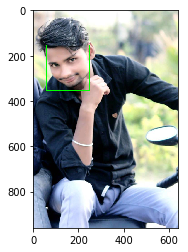

pic:  1
../face_recognition_demo/train_img//Shavaughn Henry4.jpg
找到人脸数目为：1
[[186.49229562 133.77853963 493.02004188 507.45241117   0.99995899]]
face [186 133 493 507]
crop.shape (96, 96, 3)


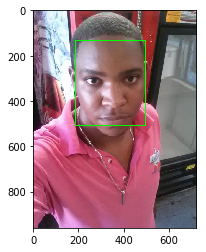

pic:  2
../face_recognition_demo/train_img//Livay Hasselnook.jpg
找到人脸数目为：1
[[ 84.95044874  50.61682972 417.02111225 456.05265422   0.99984217]]
face [ 84  50 417 456]
crop.shape (96, 96, 3)


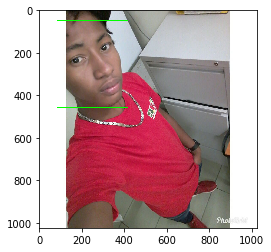

pic:  3
../face_recognition_demo/train_img//Kailash Babu3.jpg
找到人脸数目为：1
[[324.40769515 428.40397049 550.25818679 708.48197328   0.99999654]]
face [324 428 550 708]
crop.shape (96, 96, 3)


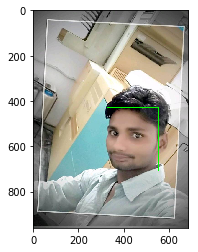

pic:  4
../face_recognition_demo/train_img//Kailash Babu2.jpg
找到人脸数目为：1
[[176.03681076 174.92360413 339.20350716 385.87506962   0.99999416]]
face [176 174 339 385]
crop.shape (96, 96, 3)


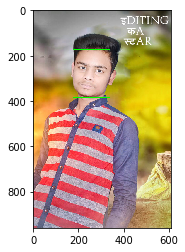

pic:  5
../face_recognition_demo/train_img//.DS_Store
pic:  6
../face_recognition_demo/train_img//Shavaughn Henry1.jpg
找到人脸数目为：1
[[331.62309015  53.84200621 414.15047836 165.59427559   0.99999893]]
face [331  53 414 165]
crop.shape (96, 96, 3)


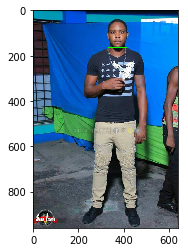

pic:  7
../face_recognition_demo/train_img//Shavaughn Henry2.jpg
找到人脸数目为：1
[[150.5844526  178.40196812 491.38619078 633.90995193   0.9999944 ]]
face [150 178 491 633]
crop.shape (96, 96, 3)


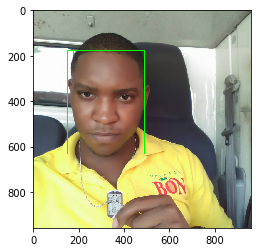

pic:  8
../face_recognition_demo/train_img//Shavaughn Henry3.jpg
找到人脸数目为：1
[[146.64054108 363.90520859 352.64608955 624.58542633   0.99997258]]
face [146 363 352 624]
crop.shape (96, 96, 3)


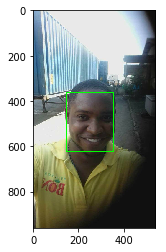

pic:  9
../face_recognition_demo/train_img//Djamel Djajo1.jpg
找到人脸数目为：2
[[318.6508137  102.15483284 487.98424506 339.4775297    0.99998653]
 [528.8499305   96.00555173 624.2455287  231.79589799   0.8244586 ]]
face [318 102 487 339]
crop.shape (96, 96, 3)
face [528  96 624 231]
crop.shape (96, 96, 3)


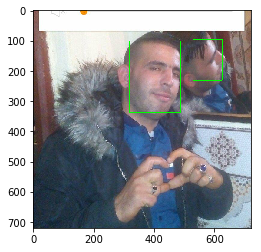

pic:  10
../face_recognition_demo/train_img//Toet Vinisi04.jpg
找到人脸数目为：1
[[141.91515803 172.72428554 255.27172628 322.10958266   0.9999783 ]]
face [141 172 255 322]
crop.shape (96, 96, 3)


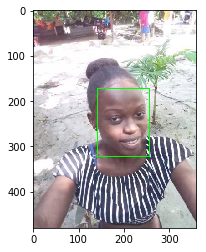

pic:  11
../face_recognition_demo/train_img//Shevonne Baird2.jpg
找到人脸数目为：1
[[341.59612779  99.51977064 688.91312612 550.92417605   0.99998391]]
face [341  99 688 550]
crop.shape (96, 96, 3)


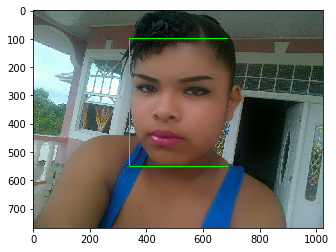

pic:  12
../face_recognition_demo/train_img//Parash Moktan4.jpg
找到人脸数目为：1
[[ 12.70635717 105.02882147 230.01849769 372.98961085   0.99999988]]
face [ 12 105 230 372]
crop.shape (96, 96, 3)


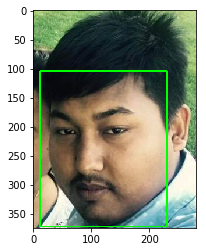

pic:  13
../face_recognition_demo/train_img//Shevonne Baird3.jpg
找到人脸数目为：1
[[278.85363547 -91.19506139 894.20936851 620.29195203   0.9999665 ]]
face [278 -91 894 620]
crop.shape (0, 616, 3)


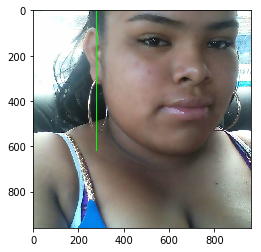

pic:  14
../face_recognition_demo/train_img//Rendel Feller4.jpg
找到人脸数目为：1
[[271.03098369 124.20863059 570.96818274 507.11437604   0.99999619]]
face [271 124 570 507]
crop.shape (96, 96, 3)


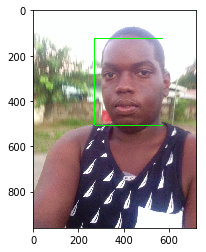

pic:  15
../face_recognition_demo/train_img//Toet Vinisi05.jpg
找到人脸数目为：1
[[373.12533723 159.98405381 530.43962169 349.2244064    0.99963498]]
face [373 159 530 349]
crop.shape (96, 96, 3)


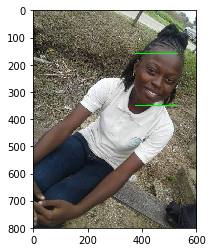

pic:  16
../face_recognition_demo/train_img//DS Miriamm2.jpg
找到人脸数目为：1
[[257.4172931   77.45744744 498.65603149 407.02348731   0.99523181]]
face [257  77 498 407]
crop.shape (96, 96, 3)


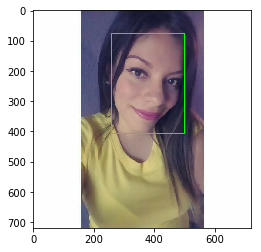

pic:  17
../face_recognition_demo/train_img//Djamel Djajo2.jpg
找到人脸数目为：1
[[255.56982188 199.02739604 345.01367765 308.45799514   0.99997103]]
face [255 199 345 308]
crop.shape (96, 96, 3)


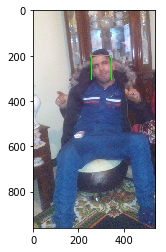

pic:  18
../face_recognition_demo/train_img//Shevonne Baird1.jpg
找到人脸数目为：2
[[120.25614981 101.46387747 430.91164844 488.03975249   0.99999797]
 [473.83471973 335.54215939 489.14190272 353.66358387   0.74851722]]
face [120 101 430 488]
crop.shape (96, 96, 3)
face [473 335 489 353]
crop.shape (96, 96, 3)


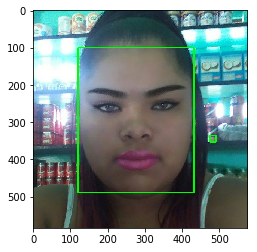

pic:  19
../face_recognition_demo/train_img//Nandy Ramos4.jpg
找到人脸数目为：1
[[173.64502618 180.38902941 416.86683383 506.43423906   0.99997485]]
face [173 180 416 506]
crop.shape (96, 96, 3)


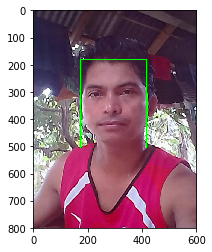

pic:  20
../face_recognition_demo/train_img//DS Miriamm1.jpg
找到人脸数目为：1
[[214.72295153 -21.38716963 494.41649084 371.99593527   0.99989784]]
face [214 -21 494 371]
crop.shape (0, 280, 3)


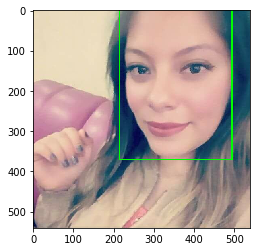

pic:  21
../face_recognition_demo/train_img//Toet Vinisi02.jpg
找到人脸数目为：1
[[333.88709125 157.52814483 449.26653969 315.6165607    0.99990642]]
face [333 157 449 315]
crop.shape (96, 96, 3)


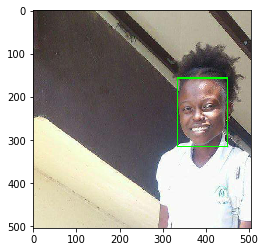

pic:  22
../face_recognition_demo/train_img//Rendel Feller3.jpg
找到人脸数目为：1
[[279.67969733 231.03886534 512.8084476  540.11881175   0.9999907 ]]
face [279 231 512 540]
crop.shape (96, 96, 3)


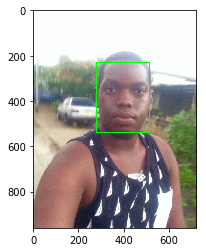

pic:  23
../face_recognition_demo/train_img//Nandy Ramos1.jpg
找到人脸数目为：1
[[168.43512526 125.7829473  387.96796992 406.24903956   0.9999671 ]]
face [168 125 387 406]
crop.shape (96, 96, 3)


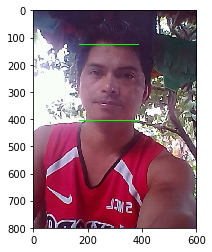

pic:  24
../face_recognition_demo/train_img//Parash Moktan3.jpg
找到人脸数目为：1
[[ 20.51178491  74.94471681 148.72954975 236.6528359    0.99999273]]
face [ 20  74 148 236]
crop.shape (96, 96, 3)


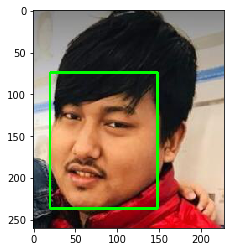

pic:  25
../face_recognition_demo/train_img//Parash Moktan2.jpg
找到人脸数目为：1
[[ 23.22997235  52.85209464 185.04719815 248.98712111   0.99996006]]
face [ 23  52 185 248]
crop.shape (96, 96, 3)


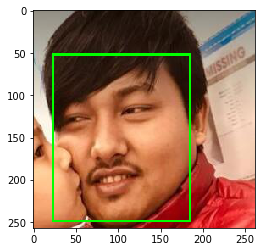

pic:  26
../face_recognition_demo/train_img//Rendel Feller2.jpg
找到人脸数目为：1
[[216.3958438  158.79589617 473.32264084 501.14244267   0.99999523]]
face [216 158 473 501]
crop.shape (96, 96, 3)


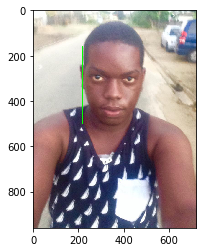

pic:  27
../face_recognition_demo/train_img//Regina Eno1.jpg
找到人脸数目为：1
[[215.54039457 208.19780952 423.87058473 476.99520832   0.99918693]]
face [215 208 423 476]
crop.shape (96, 96, 3)


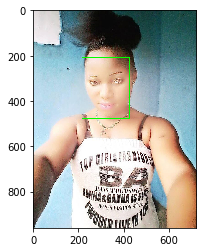

pic:  28
../face_recognition_demo/train_img//Toet Vinisi1.jpg
找到人脸数目为：1
[[ 70.13067019  64.76118988 111.66183126 119.05513883   0.99997997]]
face [ 70  64 111 119]
crop.shape (96, 96, 3)


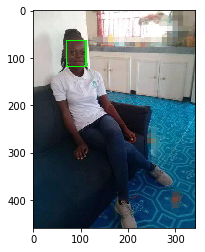

pic:  29
../face_recognition_demo/train_img//Toet Vinisi03.jpg
找到人脸数目为：1
[[183.44167832  73.51003457 255.91072521 176.04057825   0.9998877 ]]
face [183  73 255 176]
crop.shape (96, 96, 3)


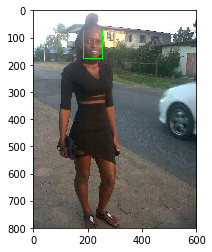

pic:  30
../face_recognition_demo/train_img//OueMina Joel1.jpg
找到人脸数目为：1
[[311.93202436 296.07994914 586.91506374 624.21739047   0.99988568]]
face [311 296 586 624]
crop.shape (96, 96, 3)


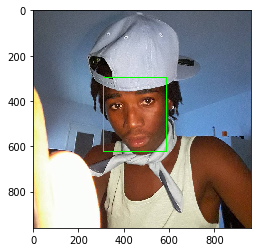

pic:  31
../face_recognition_demo/train_img//Toet Vinisi3.jpg
找到人脸数目为：1
[[183.44167832  73.51003457 255.91072521 176.04057825   0.9998877 ]]
face [183  73 255 176]
crop.shape (96, 96, 3)


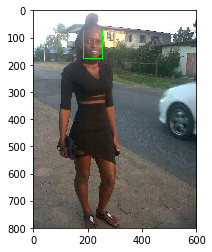

pic:  32
../face_recognition_demo/train_img//Regina Eno3.jpg
找到人脸数目为：1
[[249.1727419  -14.17257492 536.36958735 374.22670561   0.99988985]]
face [249 -14 536 374]
crop.shape (0, 287, 3)


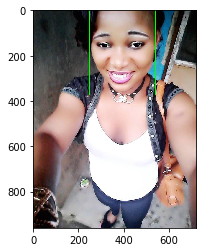

pic:  33
../face_recognition_demo/train_img//Nandy Ramos2.jpg
找到人脸数目为：1
[[141.6007508  111.42974274 427.37826595 398.91301435   0.99839216]]
face [141 111 427 398]
crop.shape (96, 96, 3)


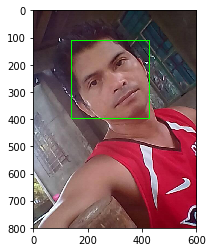

pic:  34
../face_recognition_demo/train_img//Parash Moktan1.jpg
找到人脸数目为：1
[[213.65587902  86.68995484 523.41224751 463.3963128    0.99963939]]
face [213  86 523 463]
crop.shape (96, 96, 3)


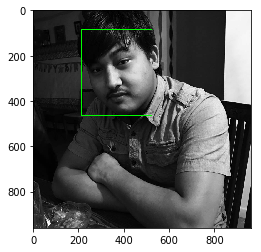

pic:  35
../face_recognition_demo/train_img//Nandy Ramos3.jpg
找到人脸数目为：1
[[139.47009258  56.68692283 383.39456744 367.19899098   0.99999714]]
face [139  56 383 367]
crop.shape (96, 96, 3)


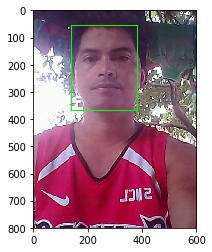

pic:  36
../face_recognition_demo/train_img//Rendel Feller1.jpg
找到人脸数目为：1
[[237.67642426 226.44877577 473.84905514 556.67024426   0.99991977]]
face [237 226 473 556]
crop.shape (96, 96, 3)


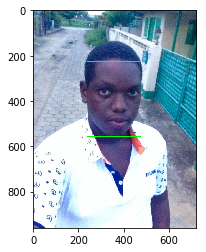

pic:  37
../face_recognition_demo/train_img//Regina Eno2.jpg
找到人脸数目为：1
[[211.03847998 118.10492372 433.40976124 434.31631542   0.99991119]]
face [211 118 433 434]
crop.shape (96, 96, 3)


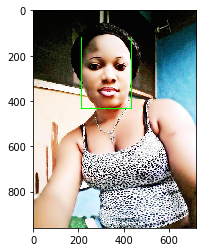

pic:  38
../face_recognition_demo/train_img//Sidney Lashae.jpg
找到人脸数目为：1
[[292.10774153 -17.54287335 688.51133996 508.26195769   0.99951065]]
face [292 -17 688 508]
crop.shape (0, 396, 3)


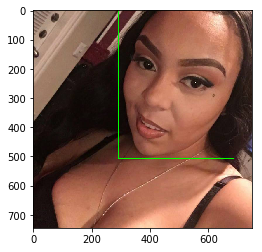

pic:  39
../face_recognition_demo/train_img//Toet Vinisi2.jpg
找到人脸数目为：1
[[333.88709125 157.52814483 449.26653969 315.6165607    0.99990642]]
face [333 157 449 315]
crop.shape (96, 96, 3)


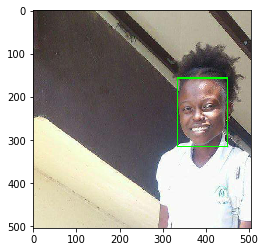

pic:  40
../face_recognition_demo/train_img//Jeanty Mayarnho Yann3.jpg
找到人脸数目为：1
[[191.08934933 120.1889098  353.66615762 340.91840732   0.80438226]]
face [191 120 353 340]
crop.shape (96, 96, 3)


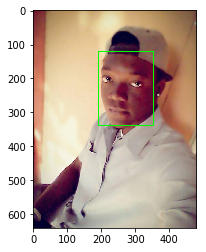

pic:  41
../face_recognition_demo/train_img//Alexa Bruny1.jpg
找到人脸数目为：1
[[237.19187859  59.81641969 371.06322882 249.2597893    0.99997377]]
face [237  59 371 249]
crop.shape (96, 96, 3)


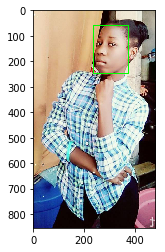

pic:  42
../face_recognition_demo/train_img//OG Smith2.jpg
找到人脸数目为：1
[[137.41372959 151.96940626 440.73872907 567.49781498   0.99990344]]
face [137 151 440 567]
crop.shape (96, 96, 3)


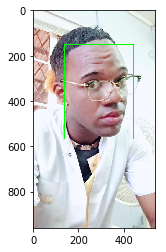

pic:  43
../face_recognition_demo/train_img//Jeanty Mayarnho Yann2.jpg
找到人脸数目为：1
[[154.0410381   86.56446823 353.97431211 357.59882882   0.99755704]]
face [154  86 353 357]
crop.shape (96, 96, 3)


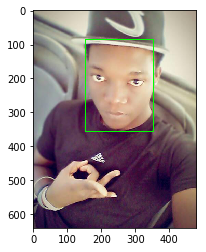

pic:  44
../face_recognition_demo/train_img//Sheila Swerissen4.jpg
找到人脸数目为：1
[[ 57.1279814   81.12941083 367.43729769 477.31988843   0.99852508]]
face [ 57  81 367 477]
crop.shape (96, 96, 3)


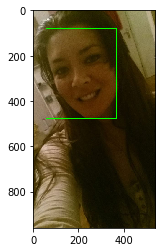

pic:  45
../face_recognition_demo/train_img//Alexa Bruny2.jpg
找到人脸数目为：1
[[221.08205558  95.16156025 305.91726291 214.49313016   0.99993253]]
face [221  95 305 214]
crop.shape (96, 96, 3)


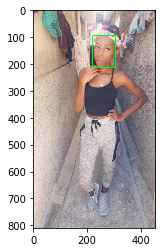

pic:  46
../face_recognition_demo/train_img//OG Smith1.jpg
找到人脸数目为：2
[[176.18866128 301.69518799 400.49376746 579.01587347   0.99971169]
 [483.79492384 654.20656548 537.15702246 719.01290566   0.90084517]]
face [176 301 400 579]
crop.shape (96, 96, 3)
face [483 654 537 719]
crop.shape (96, 96, 3)


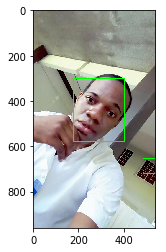

pic:  47
../face_recognition_demo/train_img//Cleudiane Silva5.jpg
找到人脸数目为：1
[[123.43972723  66.0781394  305.27269851 322.34604102   0.99811953]]
face [123  66 305 322]
crop.shape (96, 96, 3)


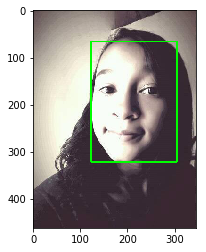

pic:  48
../face_recognition_demo/train_img//Cleudiane Silva4.jpg
找到人脸数目为：1
[[ 35.62218988 -11.91421067 135.17449212 114.33909148   0.9991073 ]]
face [ 35 -11 135 114]
crop.shape (0, 100, 3)


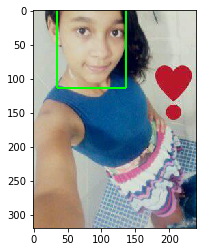

pic:  49
../face_recognition_demo/train_img//Sidney Lashae1.jpg
找到人脸数目为：1
[[149.44694439  17.18122818 219.15434662 121.24188237   0.99999821]]
face [149  17 219 121]
crop.shape (96, 96, 3)


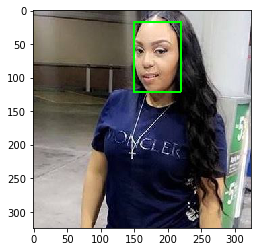

pic:  50
../face_recognition_demo/train_img//Alexa Bruny3.jpg
找到人脸数目为：1
[[110.62694257  17.47018589 377.976309   380.0798258    0.98579907]]
face [110  17 377 380]
crop.shape (96, 96, 3)


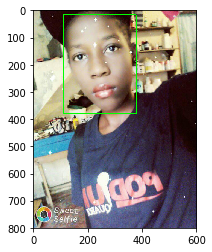

pic:  51
../face_recognition_demo/train_img//Jeanty Mayarnho Yann1.jpg
找到人脸数目为：1
[[203.48366211 117.38546562 409.32495788 356.26752596   0.99981695]]
face [203 117 409 356]
crop.shape (96, 96, 3)


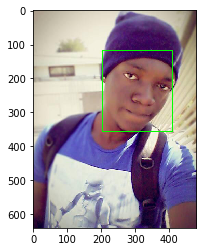

pic:  52
../face_recognition_demo/train_img//Sheila Swerissen1.jpg
找到人脸数目为：1
[[172.09832478 213.29945421 284.09509373 365.30773878   0.99987078]]
face [172 213 284 365]
crop.shape (96, 96, 3)


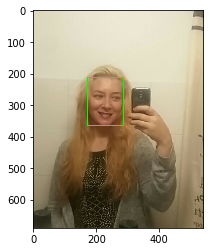

pic:  53
../face_recognition_demo/train_img//Cleudiane Silva1.jpg
找到人脸数目为：1
[[234.66082633   3.61022961 302.81117612  84.58832705   0.99804318]]
face [234   3 302  84]
crop.shape (96, 96, 3)


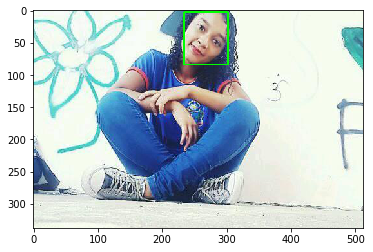

pic:  54
../face_recognition_demo/train_img//Jeanty Mayarnho Yann4.jpg
找到人脸数目为：1
[[118.41174822 197.8227163  352.20638683 475.94587019   0.99954981]]
face [118 197 352 475]
crop.shape (96, 96, 3)


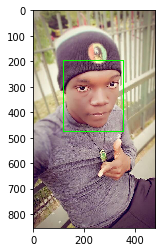

pic:  55
../face_recognition_demo/train_img//Atis Mimik Polisca1.jpg
找到人脸数目为：1
[[399.62788464 167.11938512 526.94759098 326.64768302   0.9999094 ]]
face [399 167 526 326]
crop.shape (96, 96, 3)


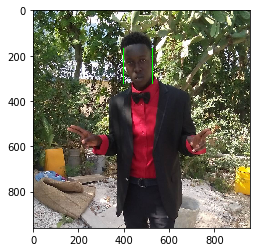

pic:  56
../face_recognition_demo/train_img//Sheila Swerissen2.jpg
找到人脸数目为：1
[[  4.92624617  96.81085418 390.60926114 644.35877442   0.99999261]]
face [  4  96 390 644]
crop.shape (96, 96, 3)


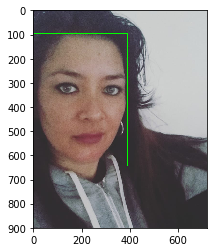

pic:  57
../face_recognition_demo/train_img//Cleudiane Silva3.jpg
找到人脸数目为：1
[[ 44.66320264  -4.33648901 191.54263618 194.14570277   0.99523997]]
face [ 44  -4 191 194]
crop.shape (0, 147, 3)


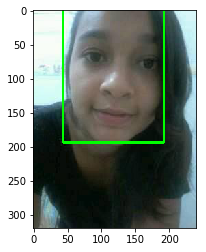

pic:  58
../face_recognition_demo/train_img//Cleudiane Silva2.jpg
找到人脸数目为：1
[[ 55.91939814  42.55946137 161.88745686 189.40030569   0.99967706]]
face [ 55  42 161 189]
crop.shape (96, 96, 3)


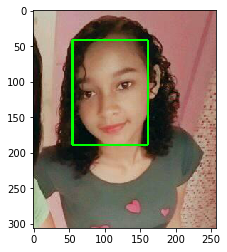

pic:  59
../face_recognition_demo/train_img//Sheila Swerissen3.jpg
找到人脸数目为：1
[[130.87888345  98.91971448 450.74876332 541.75659708   0.9999944 ]]
face [130  98 450 541]
crop.shape (96, 96, 3)


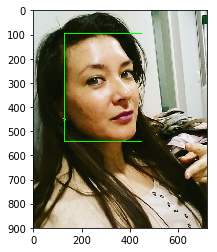

pic:  60
../face_recognition_demo/train_img//Atis Mimik Polisca2.jpg
找到人脸数目为：1
[[268.96021999 175.38788201 324.24051606 251.59343432   0.99849546]]
face [268 175 324 251]
crop.shape (96, 96, 3)


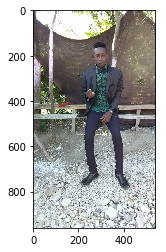

pic:  61
../face_recognition_demo/train_img//Antoine Sana2.jpg
找到人脸数目为：1
[[325.32924557  68.52778423 422.4241859  196.6530148    0.99935991]]
face [325  68 422 196]
crop.shape (96, 96, 3)


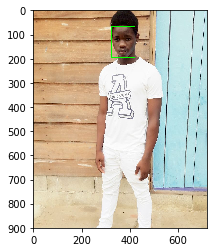

pic:  62
../face_recognition_demo/train_img//Livay Hasselnook.jpg3.jpg
找到人脸数目为：1
[[-5.30853912 -8.42339185 58.7074984  72.41186154  0.98254675]]
face [-5 -8 58 72]
crop.shape (8, 0, 3)


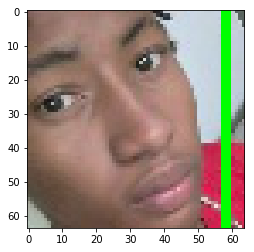

pic:  63
../face_recognition_demo/train_img//Antoine Sana3.jpg
找到人脸数目为：2
[[378.97079861 118.53034243 640.94382283 480.0862086    0.99991667]
 [823.3712737  785.72203066 862.30226009 834.30680211   0.99935168]]
face [378 118 640 480]
crop.shape (96, 96, 3)
face [823 785 862 834]
crop.shape (96, 96, 3)


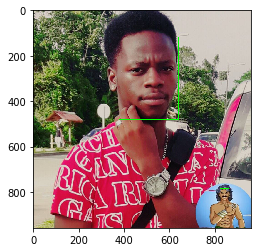

pic:  64
../face_recognition_demo/train_img//Antoine Sana1.jpg
找到人脸数目为：2
[[239.36250265 109.34510162 354.68058386 250.49306165   0.99999654]
 [191.01557148 454.35239498 266.74832936 545.49286084   0.85607266]]
face [239 109 354 250]
crop.shape (96, 96, 3)
face [191 454 266 545]
crop.shape (96, 96, 3)


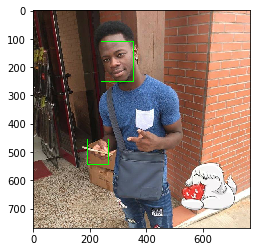

pic:  65
../face_recognition_demo/train_img//Jean Neal Gregor Pyunfie3.jpg
找到人脸数目为：1
[[307.09210762 184.42711478 547.72022995 520.26783055   0.99987948]]
face [307 184 547 520]
crop.shape (96, 96, 3)


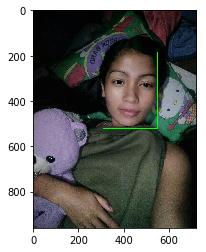

pic:  66
../face_recognition_demo/train_img//Antoine Sana4.jpg
找到人脸数目为：1
[[248.90449141  93.31655924 448.14372507 345.35501513   0.99996281]]
face [248  93 448 345]
crop.shape (96, 96, 3)


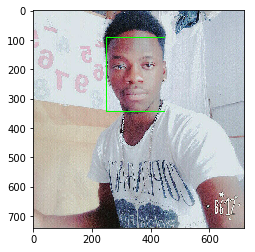

pic:  67
../face_recognition_demo/train_img//Agnes Tabelin2.jpg
找到人脸数目为：1
[[431.6871495  189.25549357 716.98523223 563.22778018   0.99982774]]
face [431 189 716 563]
crop.shape (96, 96, 3)


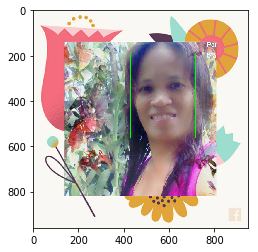

pic:  68
../face_recognition_demo/train_img//Ashley Nussy Tyreana Morgan2.jpg
找到人脸数目为：1
[[109.82941879 278.43240866 387.22238778 633.40975496   0.99972492]]
face [109 278 387 633]
crop.shape (96, 96, 3)


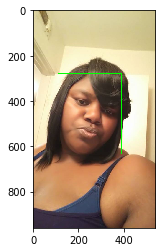

pic:  69
../face_recognition_demo/train_img//柴文俊1.jpg
找到人脸数目为：1
[[ 80.94072624  49.13939098 164.79445601 160.60185824   0.99999988]]
face [ 80  49 164 160]
crop.shape (96, 96, 3)


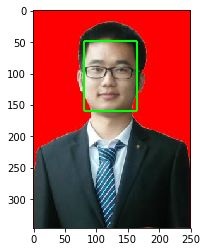

pic:  70
../face_recognition_demo/train_img//Agnes Tabelin3.jpg
找到人脸数目为：1
[[417.43223689  -8.07366022 722.93467553 407.28370003   0.99998045]]
face [417  -8 722 407]
crop.shape (0, 305, 3)


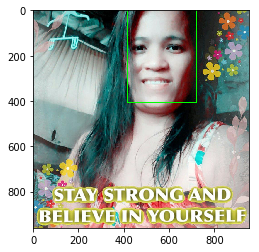

pic:  71
../face_recognition_demo/train_img//Jean Neal Gregor Pyunfie2.jpg
找到人脸数目为：2
[[208.52774303 481.97746348 267.79261951 561.44951326   0.87378192]
 [311.84217706  58.14533064 474.74114356 275.44760345   0.76289463]]
face [208 481 267 561]
crop.shape (96, 96, 3)
face [311  58 474 275]
crop.shape (96, 96, 3)


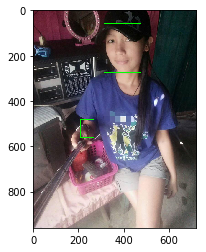

pic:  72
../face_recognition_demo/train_img//Ashley Nussy Tyreana Morgan1.jpg
找到人脸数目为：1
[[181.54848306 340.63788136 483.26654096 712.84479516   0.99996221]]
face [181 340 483 712]
crop.shape (96, 96, 3)


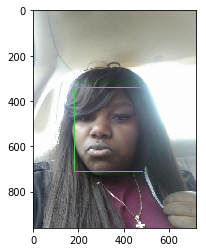

pic:  73
../face_recognition_demo/train_img//Agnes Tabelin1.jpg
找到人脸数目为：2
[[254.7437046  102.97267367 483.49998709 416.54946435   0.99918431]
 [522.8651427  425.60615247 543.09632194 453.78435135   0.78732377]]
face [254 102 483 416]
crop.shape (96, 96, 3)
face [522 425 543 453]
crop.shape (96, 96, 3)


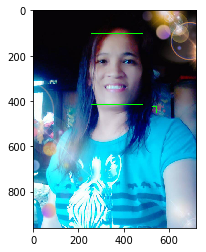

pic:  74
../face_recognition_demo/train_img//Jean Neal Gregor Pyunfie1.jpg
找到人脸数目为：1
[[396.00440599  43.33153816 562.92084208 274.00924513   0.999964  ]]
face [396  43 562 274]
crop.shape (96, 96, 3)


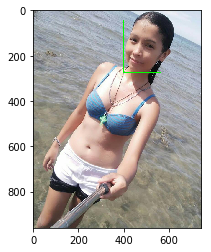

In [25]:
friends_images_path = "../face_recognition_demo/train_img/"
re_friends_images_path = "../face_recognition_demo/re_train_img/"
minsize = 20 # minimum size of face  
threshold = [ 0.6, 0.7, 0.7 ]  # three steps's threshold  
factor = 0.709 # scale factor  
gpu_memory_fraction=1.0  

def face_detection():
    
    print('Creating networks and loading parameters')  

    with tf.Graph().as_default():  
            gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=gpu_memory_fraction)  
            sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options, log_device_placement=False))  
            with sess.as_default():  
                pnet, rnet, onet = detect_face.create_mtcnn(sess, None)  

    cnt = 0
    for filename in os.listdir(friends_images_path):
        print('pic: ',cnt)
        cnt += 1
        image_path = friends_images_path + '/' + filename
        print (image_path)
        if filename.startswith('.'):
            continue
        img = misc.imread(image_path)              
        bounding_boxes, _ = detect_face.detect_face(img, minsize, pnet, rnet, onet, threshold, factor)  
        nrof_faces = bounding_boxes.shape[0]#人脸数目  
        print('找到人脸数目为：{}'.format(nrof_faces))  

        print(bounding_boxes)  

        crop_faces=[]  
        for face_position in bounding_boxes:  
            face_position = face_position.astype(int)  
            print('face',face_position[0:4])  
            cv2.rectangle(img, (face_position[0], face_position[1]), (face_position[2], face_position[3]), (0, 255, 0), 2)  
            crop = img[face_position[1]:face_position[3],  
                     face_position[0]:face_position[2],]  
            if crop.any():
                crop = cv2.resize(crop, (96, 96), interpolation=cv2.INTER_CUBIC )  
            print('crop.shape',crop.shape)  
            crop_faces.append(crop)  
            #plt.imshow(crop)  
            #plt.show() 
        for i in range(len(crop_faces)):
#             cv2.imwrite(re_friends_images_path + '/' + filename.split('.')[0] + '_' + str(i) + '.jpg', crop_faces[i])
            cv2.imwrite(re_friends_images_path + '/' + filename, crop_faces[i])

        plt.imshow(img)  
        plt.show()  

face_detection()

In [7]:
database = {}
def load_database():
    for filename in os.listdir(re_friends_images_path):
        try:
            name = filename.split('.')[0]
            print(name)
            if name =='':
                continue
            path = re_friends_images_path + '/'+ filename
            print(path)
            database[name] = img_to_encoding(path, FRmodel)
        except Exception as e:
            print(e)

load_database()
print (database)

Kailash Babu1
../face_recognition_demo/re_train_img//Kailash Babu1.jpg
Shavaughn Henry4
../face_recognition_demo/re_train_img//Shavaughn Henry4.jpg
Livay Hasselnook
../face_recognition_demo/re_train_img//Livay Hasselnook.jpg
Kailash Babu3
../face_recognition_demo/re_train_img//Kailash Babu3.jpg
Kailash Babu2
../face_recognition_demo/re_train_img//Kailash Babu2.jpg
{'Kailash Babu1': array([[ 0.06755143,  0.15068643, -0.04470997,  0.0311511 ,  0.09232606,
         0.27827182,  0.04305416, -0.12426072, -0.03250848, -0.0793487 ,
         0.06634457,  0.01165933,  0.0549844 , -0.08249947,  0.02944048,
         0.05402408, -0.04603823,  0.02452744, -0.09900852, -0.00646817,
         0.14786243,  0.01742229, -0.03574669,  0.03716786,  0.05686025,
        -0.06692519, -0.15695651, -0.1422297 ,  0.01863783,  0.13433811,
         0.07271302,  0.10213726, -0.07031136,  0.0973022 ,  0.09157602,
         0.06474543,  0.05171822, -0.04836157,  0.08870815, -0.04795983,
         0.08829175, -0.0671767

In [8]:
def sortedDictValues3(adict): 
    keys = adict.keys() 
    keys.sort() 
    return map(adict.get, keys) 
def sort_dict(dict_words):
    """
    字典排序
    :param dict_words:
    :return:
    """
    keys = dict_words.keys()
    values = dict_words.values()
    list_one = [(key, val) for key, val in zip(keys, values)]
    list_sort = sorted(list_one, key=lambda x: x[1], reverse=False)
    return list_sort
# 应用识别
def who_is_it(image_path, database, model):
    
    # 计算照片的编码
    encoding = img_to_encoding(image_path, model)
    # 定义一个最小的距离
    min_dist = 100
    
    ans = {}
    # 循环database
    for (name, db_enc) in database.items():
        
        # 计算L2距离
        dist = np.linalg.norm(encoding - db_enc)
        ans[name] = dist
        # 如果距离小于min_dist, 更新min_dist和identity
        if dist < min_dist:
            min_dist = dist
            identity = name
            
    #print('ans_size',len(ans))
    #ans.sort()
    ans = sort_dict(ans)
    #sortedDictValues3(ans)
    #print(ans)

    if min_dist > 0.7:
        print("Not in the database.")
    else:
        print ("此人为 ：" + str(identity) + ", 距离为：" + str(min_dist))
        print ('以下5个为备选项')
        cnt = 0
        for key in ans:  
            cnt += 1
            if cnt == 1:
                continue
            print(key)
            if cnt == 6:
                break
#         for i in ans:
#            

#             if cnt == 1:
#                 continue
#             print("序号：%s   值：%s" % (   list.index(i)+1  ,  i  ))
#             if cnt == 6:
               # break
    return min_dist, identity

Creating networks and loading parameters
./real_pred//pred_2_meitu_2.jpg
找到人脸数目为：5
[[7.80258274e+02 2.98343401e+01 8.30626555e+02 9.47191578e+01
  9.99999881e-01]
 [7.72023669e+01 2.14283451e+02 1.72345904e+02 3.37448829e+02
  9.99986649e-01]
 [3.70349298e+02 2.88252553e+01 4.22661744e+02 9.83656796e+01
  9.99980450e-01]
 [6.50120605e+02 6.67012493e+01 6.94444052e+02 1.24248798e+02
  9.99979377e-01]
 [2.43034955e+01 1.29331300e+02 4.41487865e+01 1.54282357e+02
  7.56173670e-01]]
[780  29 830  94]
(96, 96, 3)
[ 77 214 172 337]
(96, 96, 3)
[370  28 422  98]
(96, 96, 3)
[650  66 694 124]
(96, 96, 3)
[ 24 129  44 154]
(96, 96, 3)


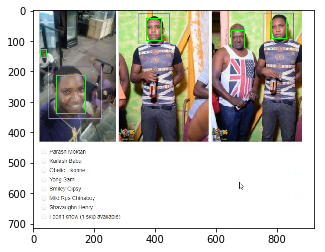

./real_pred//pred_1_meitu_3.jpg
找到人脸数目为：3
[[190.13581437 135.7629988  235.79220285 191.49588095   0.99997842]
 [488.48411021  63.13739853 530.27682757 111.64284371   0.99970382]
 [775.16759872  68.96278167 824.84625244 131.90013838   0.94441545]]
[190 135 235 191]
(96, 96, 3)
[488  63 530 111]
(96, 96, 3)
[775  68 824 131]
(96, 96, 3)


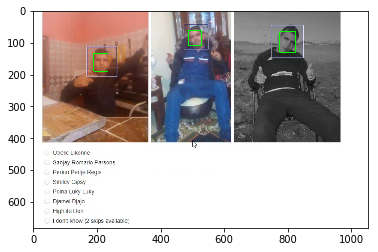

./real_pred//pred_4_meitu_5.jpg
找到人脸数目为：4
[[4.78934868e+02 7.76680109e+01 6.74844993e+02 3.61014991e+02
  9.99990702e-01]
 [7.80849597e+02 1.36776748e+02 8.56261459e+02 2.34497213e+02
  9.99989390e-01]
 [9.58352189e+02 9.20425642e+01 1.04035841e+03 2.00038665e+02
  9.99627590e-01]
 [1.65194813e+02 4.34428120e+01 3.53326653e+02 3.01327052e+02
  9.99433100e-01]]
[478  77 674 361]
(96, 96, 3)
[780 136 856 234]
(96, 96, 3)
[ 958   92 1040  200]
(96, 96, 3)
[165  43 353 301]
(96, 96, 3)


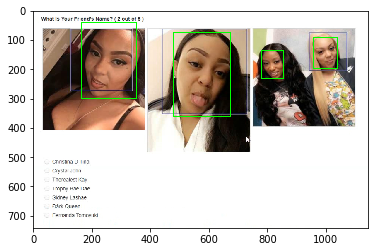

./real_pred//pred_3_meitu_4.jpg
找到人脸数目为：6
[[8.00666969e+02 1.01533074e+02 8.52772065e+02 1.67066889e+02
  9.99997616e-01]
 [6.29821181e+02 1.37677303e+02 7.00342983e+02 2.25922012e+02
  9.99970555e-01]
 [1.89404185e+02 6.93030786e+01 2.91646219e+02 2.08135458e+02
  9.99965429e-01]
 [9.73847881e+02 9.52789132e+01 1.01888893e+03 1.53014335e+02
  9.99937057e-01]
 [3.21375280e+02 6.00721340e+01 3.68984312e+02 1.16505953e+02
  9.99903917e-01]
 [1.29159252e+02 7.28971728e+01 1.77821011e+02 1.37446204e+02
  9.99857187e-01]]
[800 101 852 167]
(96, 96, 3)
[629 137 700 225]
(96, 96, 3)
[189  69 291 208]
(96, 96, 3)
[ 973   95 1018  153]
(96, 96, 3)
[321  60 368 116]
(96, 96, 3)
[129  72 177 137]
(96, 96, 3)


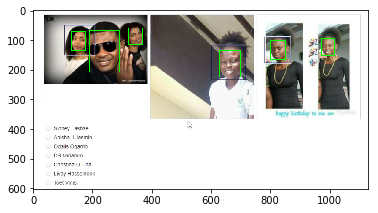

./real_pred//pred_6_meitu_7.jpg
找到人脸数目为：3
[[382.34923612  30.49849983 566.43176755 288.5167431    0.99995291]
 [ 27.21175042  32.78362924 209.46734059 291.90687351   0.99985075]
 [767.17976779  16.13553929 906.08187044 194.94182421   0.99574763]]
[382  30 566 288]
(96, 96, 3)
[ 27  32 209 291]
(96, 96, 3)
[767  16 906 194]
(96, 96, 3)


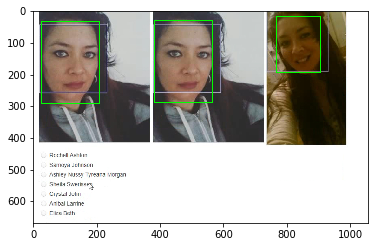

./real_pred//pred_5_meitu_6.jpg
找到人脸数目为：6
[[251.26907023  62.69160338 368.9727819  211.23169281   0.99999809]
 [160.86990519  68.52488145 248.43879037 185.75175983   0.99999142]
 [435.26243209 112.57468335 496.10632014 200.64320999   0.99998093]
 [ 31.9130536  108.26700028 118.63472201 218.42065406   0.99952281]
 [891.45171426  63.60752526 938.29991712 127.89131966   0.99882442]
 [581.19202593  85.34583957 662.25246918 185.35566887   0.97972625]]
[251  62 368 211]
(96, 96, 3)
[160  68 248 185]
(96, 96, 3)
[435 112 496 200]
(96, 96, 3)
[ 31 108 118 218]
(96, 96, 3)
[891  63 938 127]
(96, 96, 3)
[581  85 662 185]
(96, 96, 3)


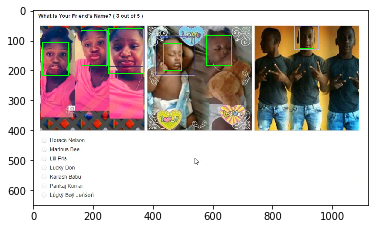

./real_pred//pred_7_meitu_8.jpg
找到人脸数目为：3
[[452.73842287  67.57313508 564.85661006 208.7838438    0.99965703]
 [785.02900435 112.99425003 884.87240088 240.01237512   0.99795097]
 [ 27.93949956  -4.83548504 135.99881928 127.72614302   0.99406058]]
[452  67 564 208]
(96, 96, 3)
[785 112 884 240]
(96, 96, 3)
[ 27  -4 135 127]
(0, 108, 3)


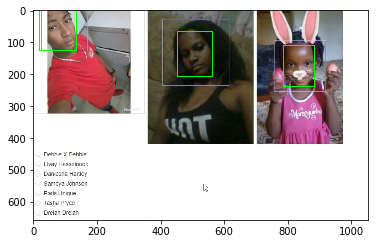

In [9]:
#predict_friends_images_path = "./pred_img"
predict_friends_images_path = "./real_pred/"
re_predict_friends_images_path = "./re_pred_img"
minsize = 20 # minimum size of face  
threshold = [ 0.6, 0.7, 0.7 ]  # three steps's threshold  
factor = 0.709 # scale factor  
gpu_memory_fraction=1.0  

def face_detection():
    
    print('Creating networks and loading parameters')  

    with tf.Graph().as_default():  
            gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=gpu_memory_fraction)  
            sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options, log_device_placement=False))  
            with sess.as_default():  
                pnet, rnet, onet = detect_face.create_mtcnn(sess, None)  


    for filename in os.listdir(predict_friends_images_path):
        image_path = predict_friends_images_path + '/' + filename
        print (image_path)
        img = misc.imread(image_path)              
        bounding_boxes, _ = detect_face.detect_face(img, minsize, pnet, rnet, onet, threshold, factor)  
        nrof_faces = bounding_boxes.shape[0]#人脸数目  
        print('找到人脸数目为：{}'.format(nrof_faces))  

        print(bounding_boxes)  

        crop_faces=[]  
        for face_position in bounding_boxes:  
            face_position=face_position.astype(int)  
            print(face_position[0:4])  
            cv2.rectangle(img, (face_position[0], face_position[1]), (face_position[2], face_position[3]), (0, 255, 0), 2)  
            crop=img[face_position[1]:face_position[3],  
                     face_position[0]:face_position[2],]  
            if crop.any():
                crop = cv2.resize(crop, (96, 96), interpolation=cv2.INTER_CUBIC )  
            print(crop.shape)  
            crop_faces.append(crop)  
#             plt.imshow(crop)  
#             plt.show() 
        for i in range(len(crop_faces)):
#             cv2.imwrite(re_predict_friends_images_path + '/' + filename.split('.')[0] + '_' + str(i) + '.jpg', crop_faces[i])
            cv2.imwrite(re_predict_friends_images_path + '/' + filename, crop_faces[i])

        plt.imshow(img)  
        plt.show()  

face_detection()

In [18]:
cnt = 0
for filename in os.listdir(re_predict_friends_images_path):
    cnt += 1
    print(cnt)
    if filename.startswith('.'):
        continue
    path = re_predict_friends_images_path + '/' + filename
    print ("正在预测图片" + filename)
    who_is_it(path, database, FRmodel)

1
正在预测图片pred_2_meitu_2.jpg
此人为 ：Tamara Victoria Roache2, 距离为：0.1879798
以下5个为备选项
('Shevonne Baird1', 0.326752)
('Agnes Tabelin1', 0.35630274)
('Djamel Djajo1', 0.41806623)
('OG Smith1', 0.4486928)
('PontBoy Ballibo4', 0.48528078)
2
3
正在预测图片pred_1_meitu_3.jpg
此人为 ：Jean Neal Gregor Pyunfie1, 距离为：0.5189774
以下5个为备选项
('Kailash Babu2', 0.54055)
('Nandy Ramos2', 0.57697326)
('OG Smith3', 0.5893118)
('Kailash Babu3', 0.60876644)
('Shavaughn Henry2', 0.64702517)
4
正在预测图片pred_4_meitu_5.jpg
此人为 ：Agnes Tabelin2, 距离为：0.66542196
以下5个为备选项
('Jeanty Mayarnho Yann2', 0.7044564)
('Cleudiane Silva1', 0.7215352)
('Rendel Feller4', 0.73151165)
('OG Smith3', 0.7352955)
('Kailash Babu3', 0.7373649)
5
正在预测图片pred_3_meitu_4.jpg
此人为 ：Shevonne Baird2, 距离为：0.43421173
以下5个为备选项
('Alexa Bruny3', 0.48629054)
('Ariela Moreno10', 0.53035617)
('Sheila Swerissen3', 0.53612274)
('Ariela Moreno6', 0.55756193)
('Jean Neal Gregor Pyunfie3', 0.55919874)
6
正在预测图片pred_6_meitu_7.jpg
此人为 ：Sheila Swerissen4, 距离为：0.26040587
以下5个为备选项
(

TypeError: 'NoneType' object is not subscriptable